In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import matplotlib.dates as mdates

In [3]:
merge_df = pd.read_csv('处理过的全量数据.csv', index_col=['day', 'id'])

In [6]:
def min_400_stock(df):
    """
    本函数用于找到每日市值最低的400只股票，其中要剔除sign为-1的股票以及上市未满7天的股票。
    :param df: 输入Dataframe，这里是merge_df
    :return: 每日市值最低的400只股票组成的Dataframe
    """
    # 创建一个空的 Series
    min_400_stocks_series = pd.Series(dtype=object)

#     筛选出非0市值的数据，同时sign为1.0的数据，并按日期进行分组
    sign_1_nonzero = df[(df['value'] != 0) & (df['sign'] == 1.0) & (df['tradable'] == 1.0)].groupby(level=0)
   
    # 遍历每个日期的数据
    for date, group in sign_1_nonzero:
        # 获取当前日期股票市值最低的400只股票的名字
        min_400 = group.nsmallest(400, 'value').index.get_level_values('id').tolist()
        # 将当前日期的股票数据存储在 Series 中，日期作为索引
        min_400_stocks_series[date] = min_400

    min_400_stocks = pd.DataFrame(min_400_stocks_series)
    min_400_stocks.index = pd.to_datetime(min_400_stocks.index)
    min_400_stocks.sort_index(ascending=True, inplace=True)
    min_400_stocks.index = min_400_stocks.index.strftime('%Y-%m-%d')
    min_400_stocks.columns = ['stock']
    
    return min_400_stocks

In [207]:
min_400_df = min_400_stock(merge_df)

In [208]:
min_400_df = min_400_df[(min_400_df.index >= '2015-01-05') & (min_400_df.index <= '2023-12-29')]
min_400_df

,stock
2015-01-05,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-06,"[600455.SH, 000004.SZ, 600421.SH, 000803.SZ, 3..."
2015-01-07,"[600455.SH, 000004.SZ, 600421.SH, 000803.SZ, 6..."
2015-01-08,"[600455.SH, 000004.SZ, 600421.SH, 600656.SH, 6..."
2015-01-09,"[600455.SH, 600421.SH, 000004.SZ, 600444.SH, 6..."
...,...
2023-12-25,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-26,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-27,"[688701.SH, 688565.SH, 688215.SH, 688096.SH, 6..."
2023-12-28,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."


In [209]:
min_400_df.index = pd.to_datetime(min_400_df.index)
first_weekday = min_400_df.index[0].dayofweek
min_400_df['Weekday_Label'] = (min_400_df.index.dayofweek == first_weekday).astype(int)

In [210]:
min_400_df

,stock,Weekday_Label
2015-01-05,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",1
2015-01-06,"[600455.SH, 000004.SZ, 600421.SH, 000803.SZ, 3...",0
2015-01-07,"[600455.SH, 000004.SZ, 600421.SH, 000803.SZ, 6...",0
2015-01-08,"[600455.SH, 000004.SZ, 600421.SH, 600656.SH, 6...",0
2015-01-09,"[600455.SH, 600421.SH, 000004.SZ, 600444.SH, 6...",0
...,...,...
2023-12-25,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",1
2023-12-26,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",0
2023-12-27,"[688701.SH, 688565.SH, 688215.SH, 688096.SH, 6...",0
2023-12-28,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",0


In [211]:
new_df = pd.DataFrame(index=min_400_df.index, columns=min_400_df.columns)

for i in range(0, len(new_df)):
    if min_400_df.iloc[i, 1] == 1 and i == 0:
        first_index_stock = min_400_df.iloc[i]['stock']
        while min_400_df.iloc[i + 1, 1] != 1:
            new_df.iloc[i, 0] = first_index_stock
            i += 1
        new_df.iloc[i, 0] = first_index_stock
    elif min_400_df.iloc[i, 1] == 1 and i != 0:
        first_index_stock = min_400_df.iloc[i]['stock']
        while i != len(new_df) - 1 and min_400_df.iloc[i + 1, 1] != 1:
            new_df.iloc[i, 0] =  first_index_stock
            i += 1
        new_df.iloc[i, 0] = first_index_stock
new_df = new_df.drop('Weekday_Label', axis=1)


In [212]:
new_df

,stock
2015-01-05,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-06,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-07,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-08,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-09,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
...,...
2023-12-25,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-26,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-27,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-28,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."


In [104]:
new_df1 = pd.DataFrame(index=min_400_df.index, columns=min_400_df.columns)

for i in range(0, len(min_400_df), 20):
    if i < len(min_400_df) - 21:
        first_index_stock = min_400_df.iloc[i]['stock']
        for i in range(i, i + 20):
            new_df1.iloc[i, 0] = first_index_stock
    else:
        first_index_stock = min_400_df.iloc[i]['stock']
        for i in range(i, len(min_400_df)):
            new_df1.iloc[i, 0] =  first_index_stock

In [199]:
df_test = min_400_df.explode('stock')

df_test['dum'] = 1
_res = df_test.reset_index().pivot(index='index',columns='stock',values='dum').fillna(0)
_res1 = merge_df.loc[:, 'ud'].unstack()[_res.columns]
_res1 = _res1[(_res1.index >= '2015-01-05') & (_res1.index <= '2023-12-29')]
matrix1 = _res.values
matrix2 = _res1.values
# matrix2 = np.round(matrix2, decimals=2)

matrix = np.multiply(matrix1, matrix2)
matrix = np.round(matrix, decimals=2)

In [213]:
df_test1 = new_df.explode('stock')

df_test1['dum'] = 1
_res = df_test1.reset_index().pivot(index='index',columns='stock',values='dum').fillna(0)
_res1 = merge_df.loc[:, 'ud'].unstack()[_res.columns]
_res1 = _res1[(_res1.index >= '2015-01-05') & (_res1.index <= '2023-12-29')]
matrix1 = _res.values
matrix2 = _res1.values
# matrix2 = np.round(matrix2, decimals=2)

matrix = np.multiply(matrix1, matrix2)
matrix = np.round(matrix, decimals=2)

In [463]:
df_test2 = new_df1.explode('stock')

df_test2['dum'] = 1
_res = df_test2.reset_index().pivot(index='index',columns='stock',values='dum').fillna(0)
_res1 = merge_df.loc[:, 'ud'].unstack()[_res.columns]
_res1 = _res1[(_res1.index >= '2015-01-05') & (_res1.index <= '2023-12-29')]
matrix1 = _res.values
matrix2 = _res1.values
# matrix2 = np.round(matrix2, decimals=2)

matrix = np.multiply(matrix1, matrix2)
matrix = np.round(matrix, decimals=2)

In [200]:
def draw(df, matrix):
    """
    本函数用于计算指数以及根据计算的指数画图。
    :param df: 输入Dataframe，min_400_stocks
    """
    index = 1000
    df_pic = pd.DataFrame(columns=['day', 'index'])
    # 对于每一个交易日，从中根据市值选出后400的股票并作等权计算
#     for i in range(0, 5816):  # 全量
#     for i in range(3426, 3746):  # 牛市
    for i in range(df.index.get_loc('2015-01-05'), df.index.get_loc('2023-12-29')):  # 熊市
        total_ud = 0  # 涨跌幅
        stock_day = df.index[i]
        total_ud += np.sum(matrix[i])
        if i == df.index.get_loc('2015-01-05'):
            index = index
        else:
#             print(stock_day)
#             print(total_ud)
            index = index * (1 + total_ud / 40000)
#         print(index)
#         print('--------')
        df_pic.loc[len(df_pic)] = [str(stock_day), index]  
    return df_pic

In [201]:
df_pic = draw(min_400_df, matrix)

In [214]:
df_pic1 = draw(new_df, matrix)

In [218]:
df_pic1['day'] = pd.to_datetime(df_pic1['day'])

In [226]:
df_pic1

,day,index
0,2015-01-05,1000.000000
1,2015-01-06,1019.507750
2,2015-01-07,1016.922278
3,2015-01-08,1018.696299
4,2015-01-09,1011.307186
...,...,...
2183,2023-12-22,15785.333701
2184,2023-12-25,15590.321689
2185,2023-12-26,15406.001213
2186,2023-12-27,15538.500527


In [464]:
df_pic2 = draw(new_df1, matrix)

In [465]:
reference_price = df_pic[df_pic['day'] == '2015-01-05']['index'].values[0]

df_pic['total_ud'] = (df_pic['index'] - reference_price) / reference_price * 100

In [466]:
df_pic['day_ud'] = df_pic['index'].pct_change()
df_pic['day_ud'] = df_pic['day_ud'] * 100
df_pic = df_pic.fillna(0).set_index('day')
df_pic.index.name = None

In [467]:
df_pic

,index,total_ud,day_ud
2015-01-05,1000.000000,0.000000,0.000000
2015-01-06,1019.875000,1.987500,1.987500
2015-01-07,1017.420416,1.742042,-0.240675
2015-01-08,1019.083898,1.908390,0.163500
2015-01-09,1012.025723,1.202572,-0.692600
...,...,...,...
2023-12-22,13716.949648,1271.694965,-1.910900
2023-12-25,13547.490452,1254.749045,-1.235400
2023-12-26,13385.526817,1238.552682,-1.195525
2023-12-27,13513.412140,1251.341214,0.955400


In [227]:
reference_price = df_pic1[df_pic1['day'] == '2015-01-05']['index'].values[0]

df_pic1['total_ud'] = (df_pic1['index'] - reference_price) / reference_price * 100

In [228]:
df_pic1['day_ud'] = df_pic1['index'].pct_change()
df_pic1['day_ud'] = df_pic1['day_ud'] * 100
df_pic1 = df_pic1.fillna(0).set_index('day')
df_pic1.index.name = None

In [229]:
df_pic1

,index,total_ud,day_ud
2015-01-05,1000.000000,0.000000,0.000000
2015-01-06,1019.507750,1.950775,1.950775
2015-01-07,1016.922278,1.692228,-0.253600
2015-01-08,1018.696299,1.869630,0.174450
2015-01-09,1011.307186,1.130719,-0.725350
...,...,...,...
2023-12-22,15785.333701,1478.533370,-1.947725
2023-12-25,15590.321689,1459.032169,-1.235400
2023-12-26,15406.001213,1440.600121,-1.182275
2023-12-27,15538.500527,1453.850053,0.860050


In [162]:
# df_pic.index = pd.to_datetime(df_pic.index)
df_pic1.index = pd.to_datetime(df_pic1.index)

In [478]:
last_dates = df_pic.resample('Y').last()
last_dates1 = df_pic1.resample('Y').last()
first_year = (last_dates1['total_ud'] - last_dates['total_ud']).iloc[0]
df = (last_dates1['total_ud'] - last_dates['total_ud']).diff()
df.iloc[0] = first_year
df.index = df.index.strftime('%Y')

In [480]:
df

2015    28.316569
2016    20.829089
2017    -6.953420
2018     1.525539
2019    18.947374
2020    13.724828
2021    28.039767
2022     9.287857
2023    62.285360
Name: total_ud, dtype: float64

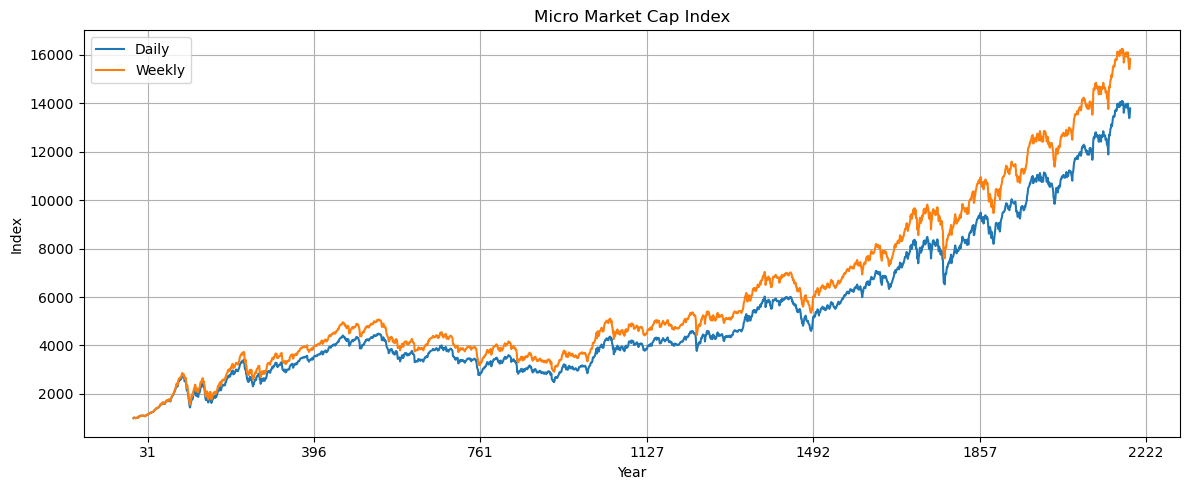

In [220]:
plt.figure(figsize=(12, 5))

plt.plot(df_pic.index, df_pic['index'], linestyle='-', label='Daily')
plt.plot(df_pic1.index, df_pic1['index'], linestyle='-', label='Weekly')
# plt.plot(df_pic2.index, df_pic2['index'], linestyle='-', label='Monthly')

# 设置间隔为一个月
months = MonthLocator(interval=12)
# 应用间隔到 x 轴
plt.gca().xaxis.set_major_locator(months)

plt.title('Micro Market Cap Index')
plt.xlabel('Year')
plt.ylabel('Index')
plt.grid(True)
plt.tight_layout()
plt.legend()


plt.show()

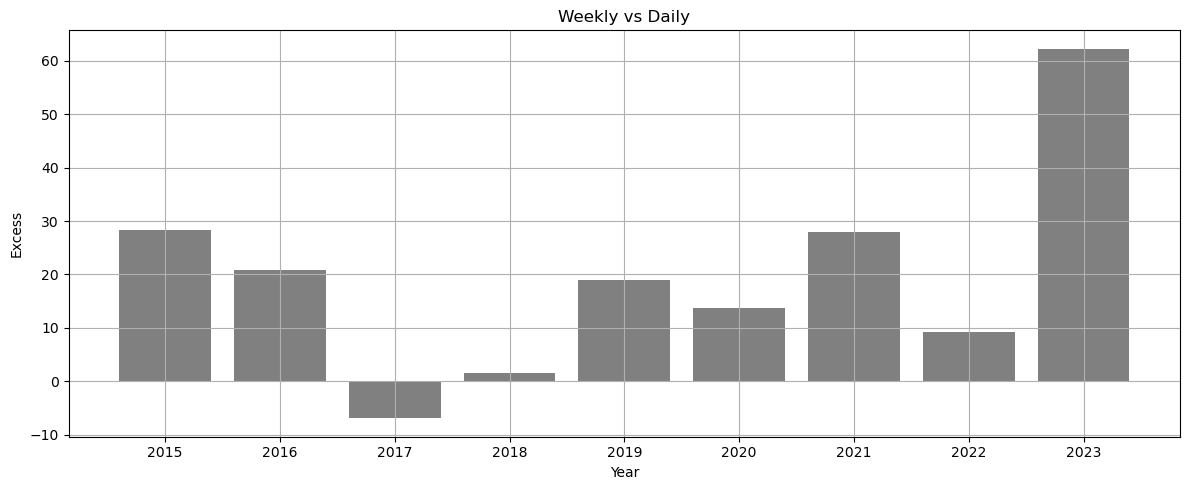

In [482]:
plt.figure(figsize=(12, 5))
plt.bar(df.index, df, linestyle='-', color='grey')
# 设置间隔为一个月
# months = MonthLocator(interval=8) 
# 应用间隔到 x 轴
# plt.gca().xaxis.set_major_locator(months)

plt.title('Weekly vs Daily')
plt.xlabel('Year')
plt.ylabel('Excess')
plt.grid(True)
plt.tight_layout()

plt.show()

In [500]:
merge_df

pre_close  close  pre_open   open  stopin      ud  \
day        id                                                             
2000-01-04 000001.SZ      17.45  18.29     17.47  17.50   19.20  4.8138   
           000002.SZ       9.75  10.30      9.70   9.80   10.73  5.6410   
           000003.SZ       5.47   5.74      5.50   5.48    6.02  4.9360   
           000004.SZ       8.51   8.74      8.69   8.55    9.36  2.7027   
           000005.SZ       6.04   6.24      6.08   6.10    6.64  3.3113   
...                         ...    ...       ...    ...     ...     ...   
2023-12-29 688799.SH      47.21  48.94     47.69  47.22   51.93  3.6645   
           688800.SH      39.52  40.18     37.42  39.50   43.47  1.6700   
           688819.SH      27.91  27.92     27.02  28.00   30.70  0.0358   
           688981.SH      53.13  53.02     51.70  53.00   58.44 -0.2070   
           689009.SH      29.20  29.66     28.58  29.25   32.12  1.5753   

                        pre_number  tradable         value  sign  
day        id                                                     
2000-01-04 000001.SZ  1.551847e+09       1.0  2.707973e+10   1.0  
           000002.SZ  5.455375e+08       1.0  5.318990e+09   1.0  
           000003.SZ  3.334336e+08       1.0  1.823882e+09   1.0  
           000004.SZ  8.397668e+07       1.0  7.146416e+08  -1.0  
           000005.SZ  5.180175e+08       1.0  3.128826e+09   1.0  
...                            ...       ...           ...   ...  
2023-12-29 688799.SH  9.380000e+07       1.0  4.428298e+09   1.0  
           688800.SH  1.584199e+08       1.0  6.260753e+09   1.0  
           688819.SH  9.721000e+08       1.0  2.713131e+10   1.0  
           688981.SH  7.946542e+09       1.0  4.221998e+11   1.0  
           689009.SH  0.000000e+00       0.0  0.000000e+00   1.0  

[30987648 rows x 10 columns]

In [224]:
new_df.index = pd.to_datetime(new_df.index)

In [230]:
merge = pd.merge(df_pic1, new_df, left_index=True, right_index=True, how='left')
merge.index = merge.index.strftime('%Y-%m-%d')

merge

,index,total_ud,day_ud,stock
2015-01-05,1000.000000,0.000000,0.000000,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-06,1019.507750,1.950775,1.950775,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-07,1016.922278,1.692228,-0.253600,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-08,1018.696299,1.869630,0.174450,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
2015-01-09,1011.307186,1.130719,-0.725350,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6..."
...,...,...,...,...
2023-12-22,15785.333701,1478.533370,-1.947725,"[688701.SH, 688565.SH, 688215.SH, 688096.SH, 6..."
2023-12-25,15590.321689,1459.032169,-1.235400,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-26,15406.001213,1440.600121,-1.182275,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."
2023-12-27,15538.500527,1453.850053,0.860050,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6..."


# 五日调仓

In [177]:
# 创建money列并设置第一行的值
merge['money'] = 0.0
idx = 4
# merge.at[merge.index[0], 'money'] = 400000000
for i in range(0, len(merge), 5):
#     print('-----1-----')
    if i == 0:
        fee = 0
        merge.at[merge.index[i], 'money'] = 400000000
        pre_assets = merge.at[merge.index[i], 'money'] / 400
        for i in range(i, 4):
            money = merge.at[merge.index[i], 'money']
            ud = merge.loc[merge.index[i + 1], 'day_ud'] / 100
            merge.at[merge.index[i + 1], 'money'] = money * (1 + ud)
#             print(merge.index[i])
#             print(merge.at[merge.index[i], 'money'])
#             print('-----2-----')
        assets = merge.at[merge.index[idx], 'money'] / 400
        today_stock = set(merge.at[merge.index[idx], 'stock'])  # 今日成分股
        tomorrow_stock = set(merge.at[merge.index[idx + 1], 'stock'])  # 明日成分股
        today_delete = today_stock - tomorrow_stock
        different_stocks_number = len(today_stock.symmetric_difference(tomorrow_stock)) / 2  # 不同股票的数量
        for stock in today_stock:
            close = merge_df.loc[merge.index[0], stock][1]
            ud = (merge_df.loc[merge.index[idx], stock][1] - close) / close
            if stock in today_delete:
                fee += pre_assets * (1 + ud) * 0.002
            else:
                number = pre_assets * (1 + ud) - assets
                if number > 0:
                    fee += number * 0.002  # 涨的股票应该卖出
                elif number < 0:
                    fee += abs(number * 0.001)  # 跌的股票应该买入
        fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费
        merge.at[merge.index[idx + 1], 'money'] = merge.at[merge.index[idx], 'money'] - fee
#         print(merge.index[idx])
#         print(merge.at[merge.index[idx], 'money'])
#         print('-----3-----')
    elif i > 0 and i < len(merge) - 4:
        idx += 5
        fee = 0
        a = i
        pre_assets = merge.loc[merge.index[i - 1], 'money'] / 400  # 算上涨跌幅并扣除调仓费用后，等权每只股票分到的金额
        for i in range(i, i+4):
            money = merge.at[merge.index[i], 'money']
            ud = merge.loc[merge.index[i + 1], 'day_ud'] / 100
            merge.at[merge.index[i + 1], 'money'] = money * (1 + ud)
#             print(i)
#             print(merge.index[i])
#             print(merge.at[merge.index[i], 'money'])
#             print('-----4-----')
        # 计算不同的股票数量
        assets = merge.at[merge.index[idx], 'money'] / 400
        today_stock = set(merge.at[merge.index[idx], 'stock'])  # 今日成分股
        tomorrow_stock = set(merge.at[merge.index[idx + 1], 'stock'])  # 明日成分股
        today_delete = today_stock - tomorrow_stock  # 今日成分股剔除的股票
        tomorrow_add = tomorrow_stock - today_stock  # 明日成分股加入的股票
        different_stocks_number = len(today_stock.symmetric_difference(tomorrow_stock)) / 2  # 不同股票的数量
        for stock in today_stock:
            close = merge_df.loc[merge.index[a], stock][0]
            ud = (merge_df.loc[merge.index[idx], stock][1] - close) / close

            if stock in today_delete:
                fee += pre_assets * (1 + ud) * 0.002
            else:
                number = pre_assets * (1 + ud) - assets
                if number > 0:
                    fee += number * 0.002  # 涨的股票应该卖出
                elif number < 0:
                    fee += abs(number * 0.001)  # 跌的股票应该买入

        # 计算手续费
        fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费
        merge.at[merge.index[idx + 1], 'money'] = merge.at[merge.index[idx], 'money'] - fee
#         print(merge.index[idx])
#         print(fee)
#         print(merge.at[merge.index[idx], 'money'])
#         print('-----5-----')
    elif i > len(merge) - 5:
        pre_assets = merge.loc[merge.index[i - 1], 'money'] / 400
        for i in range(i, len(merge)-1):
            money = merge.at[merge.index[i], 'money']
            ud = merge.loc[merge.index[i + 1], 'day_ud'] / 100
            merge.at[merge.index[i + 1], 'money'] = money * (1 + ud)

/var/folders/n7/hnlkj7_56ddd279tj0k4752c0000gn/T/ipykernel_59498/3700028057.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  ud = (merge_df.loc[merge.index[idx], stock][1] - close) / close
/var/folders/n7/hnlkj7_56ddd279tj0k4752c0000gn/T/ipykernel_59498/3700028057.py:73: RuntimeWarning: invalid value encountered in scalar multiply
  fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费


In [178]:
merge

,index,total_ud,day_ud,stock,money
2015-01-05,1000.000000,0.000000,0.000000,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",4.000000e+08
2015-01-06,1019.507750,1.950775,1.950775,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",4.078031e+08
2015-01-07,1016.922278,1.692228,-0.253600,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",4.067689e+08
2015-01-08,1018.696299,1.869630,0.174450,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",4.074785e+08
2015-01-09,1011.307186,1.130719,-0.725350,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",4.045229e+08
...,...,...,...,...,...
2023-12-22,15785.333701,1478.533370,-1.947725,"[688701.SH, 688565.SH, 688215.SH, 688096.SH, 6...",NaN
2023-12-25,15590.321689,1459.032169,-1.235400,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",NaN
2023-12-26,15406.001213,1440.600121,-1.182275,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",NaN
2023-12-27,15538.500527,1453.850053,0.860050,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",NaN


In [179]:
df_5_day = merge.copy()

# 日度调仓

In [232]:
merge['money'] = 0.0
merge.at[merge.index[0], 'money'] = 400000000
# 计算money列从第二行开始的值
for i in range(1, len(merge)-1):
#         for i in range(1, 6):
    fee = 0
    total_ud = 0
    total_ud1 = 0
    pre_assets = merge.loc[merge.index[i - 1], 'money'] / 400  # 算上涨跌幅并扣除调仓费用后，等权每只股票分到的金额
    # 计算不同的股票数量
    today_stock = set(merge.at[merge.index[i], 'stock'])  # 今日成分股
    tomorrow_stock = set(merge.at[merge.index[i + 1], 'stock'])  # 明日成分股
    today_delete = today_stock - tomorrow_stock  # 今日成分股剔除的股票
    tomorrow_add = tomorrow_stock - today_stock  # 明日成分股加入的股票
    different_stocks_number = len(today_stock.symmetric_difference(tomorrow_stock)) / 2  # 不同股票的数量
#     print(previous_stock)
    for stock in today_stock:
        # 锁定日期：print(merge.index[i])，锁定股票：print(stock)
        # 两种算法计算涨跌幅，一个是利用每只股票的涨跌幅和求涨跌幅
        ud = merge_df.loc[merge.index[i], stock][5] / 100
        total_ud1 += ud / 400  # 取涨跌幅所占的权重，400只股票也就是除以400

        # 第二个是利用指数的涨跌幅直接拿到作为收益的涨跌幅
        total_ud = merge.loc[merge.index[i], 'day_ud'] / 100
    for stock in today_stock:
        ud = merge_df.loc[merge.index[i], stock][5] / 100
        if stock in today_delete:
            fee += pre_assets * (1 + ud) * 0.002  # 如果是剔除的股票，则计算卖出手续费
        else:
            # 昨日每只股票到今天的最终价格减去今天的等权金额
            # 如果是正数，说明说赚钱了应该减仓；如果是负数，说明亏钱了，应该加仓
            assets = pre_assets * (1 + total_ud)
            number = pre_assets * (1 + ud) - assets
            if number > 0:
                fee += number * 0.002  # 涨的股票应该卖出
            elif number < 0:
                fee += abs(number * 0.001)  # 跌的股票应该买入

    # 计算手续费
    fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费
    # 参考每日涨跌幅计算money
    #             ud_per_day = merge.at[merge.index[i], 'day_ud'] / 100
    #             previous_money = merge.at[merge.index[i - 1], 'money']
    merge.at[merge.index[i], 'money'] = pre_assets * 400 * (1 + total_ud) - fee


In [233]:
df_day = merge.copy()

In [236]:
df_day = df_day.drop(df_day.index[-1])

# 每周一调仓

In [188]:
merge.index = pd.to_datetime(merge.index)
first_weekday = merge.index[0].dayofweek

In [189]:
merge['Weekday_Label'] = (merge.index.dayofweek == first_weekday).astype(int)

In [190]:
merge.index = merge.index.strftime('%Y-%m-%d')

In [191]:
merge

,index,total_ud,day_ud,stock,Weekday_Label
2015-01-05,1000.000000,0.000000,0.000000,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",1
2015-01-06,1019.507750,1.950775,1.950775,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",0
2015-01-07,1016.922278,1.692228,-0.253600,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",0
2015-01-08,1018.696299,1.869630,0.174450,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",0
2015-01-09,1011.307186,1.130719,-0.725350,"[600455.SH, 000004.SZ, 300268.SZ, 000803.SZ, 6...",0
...,...,...,...,...,...
2023-12-22,15785.333701,1478.533370,-1.947725,"[688701.SH, 688565.SH, 688215.SH, 688096.SH, 6...",0
2023-12-25,15590.321689,1459.032169,-1.235400,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",1
2023-12-26,15406.001213,1440.600121,-1.182275,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",0
2023-12-27,15538.500527,1453.850053,0.860050,"[688701.SH, 688565.SH, 688096.SH, 688215.SH, 6...",0


In [192]:
merge['money'] = 0.0
for i in range(0, len(merge)):
    fee = 0
    if merge.iloc[i, 4] == 1 and i == 0:  # 第一天 不调仓，只计算涨跌幅
        merge.at[merge.index[i], 'money'] = 400000000
        pre_assets = merge.at[merge.index[i], 'money'] / 400
        while merge.iloc[i + 1, 4] != 1:
            money = merge.at[merge.index[i], 'money']
            ud = merge.loc[merge.index[i + 1], 'day_ud'] / 100
            merge.at[merge.index[i + 1], 'money'] = money * (1 + ud)
            i += 1
        assets = merge.at[merge.index[i], 'money'] / 400
        today_stock = set(merge.at[merge.index[i], 'stock'])  # 今日成分股
        tomorrow_stock = set(merge.at[merge.index[i + 1], 'stock'])  # 明日成分股
        today_delete = today_stock - tomorrow_stock
        different_stocks_number = len(today_stock.symmetric_difference(tomorrow_stock)) / 2  # 不同股票的数量
        for stock in today_stock:
            close = merge_df.loc[merge.index[0], stock][1]
            ud = (merge_df.loc[merge.index[i], stock][1] - close) / close
            if stock in today_delete:
                fee += pre_assets * (1 + ud) * 0.002
            else:
                number = pre_assets * (1 + ud) - assets
                if number > 0:
                    fee += number * 0.002  # 涨的股票应该卖出
                elif number < 0:
                    fee += abs(number * 0.001)  # 跌的股票应该买入
        fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费
        merge.at[merge.index[i + 1], 'money'] = merge.at[merge.index[i], 'money'] - fee
    elif merge.iloc[i, 4] == 1 and i != 0:  # 调仓日到，开始调仓
        a = i
#         print(i)
        pre_assets = merge.at[merge.index[i - 1], 'money'] / 400
#         print(pre_assets)
        while merge.iloc[i + 1, 4] != 1 and i != len(merge) - 2:
            money = merge.at[merge.index[i], 'money']
            ud = merge.loc[merge.index[i], 'day_ud'] / 100
            merge.at[merge.index[i + 1], 'money'] = money * (1 + ud)
            i += 1
        assets = merge.at[merge.index[i], 'money'] / 400
        today_stock = set(merge.at[merge.index[i], 'stock'])  # 今日成分股
        tomorrow_stock = set(merge.at[merge.index[i + 1], 'stock'])  # 明日成分股
        today_delete = today_stock - tomorrow_stock
        different_stocks_number = len(today_stock.symmetric_difference(tomorrow_stock)) / 2  # 不同股票的数量
        for stock in today_stock:
            close = merge_df.loc[merge.index[a], stock][0]
            ud = (merge_df.loc[merge.index[i], stock][1] - close) / close
#             print(merge.index[a])
#             print(merge.index[i])
#             print(stock)
#             print(close)
#             print(ud)
            if stock in today_delete:
                fee += pre_assets * (1 + ud) * 0.002
            else:
                number = pre_assets * (1 + ud) - assets
                if number > 0:
                    fee += number * 0.002  # 涨的股票应该卖出
                elif number < 0:
                    fee += abs(number * 0.001)  # 跌的股票应该买入
        fee += different_stocks_number * 0.001 * assets  # 加入的成分股买入手续费
        merge.at[merge.index[i + 1], 'money'] = merge.at[merge.index[i], 'money'] - fee
        

In [194]:
df_week = merge.copy()

In [237]:
df_week = df_week.drop(df_week.index[-1])

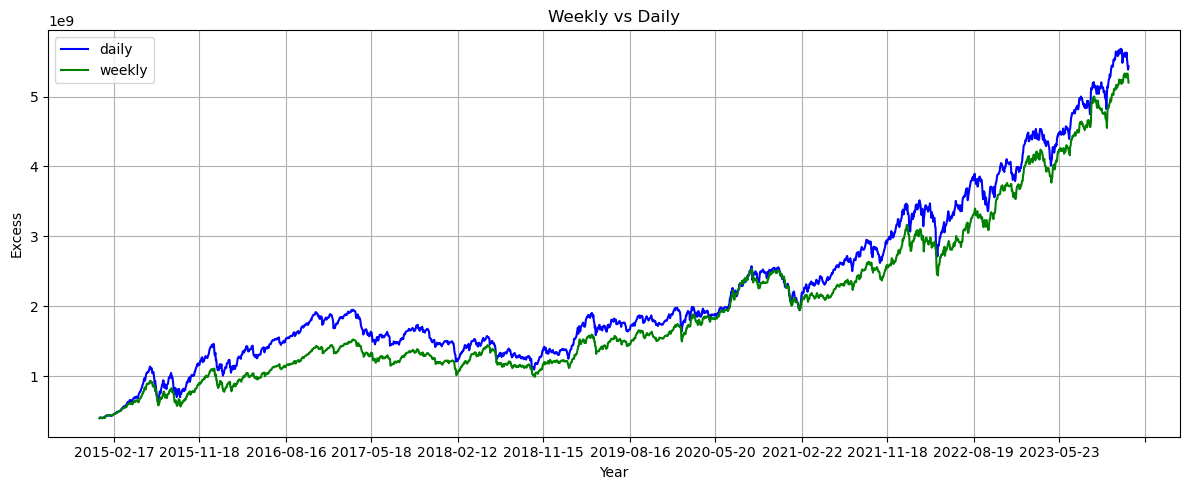

In [247]:
plt.figure(figsize=(12, 5))
plt.plot(df_week.index, df_day['money'], linestyle='-', color='blue', label='daily')
plt.plot(df_week.index, df_week['money'], linestyle='-', color='green', label='weekly')
# 设置间隔为一个月
months = MonthLocator(interval=6) 
# 应用间隔到 x 轴
plt.gca().xaxis.set_major_locator(months)

plt.title('Weekly vs Daily')
plt.xlabel('Year')
plt.ylabel('Excess')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

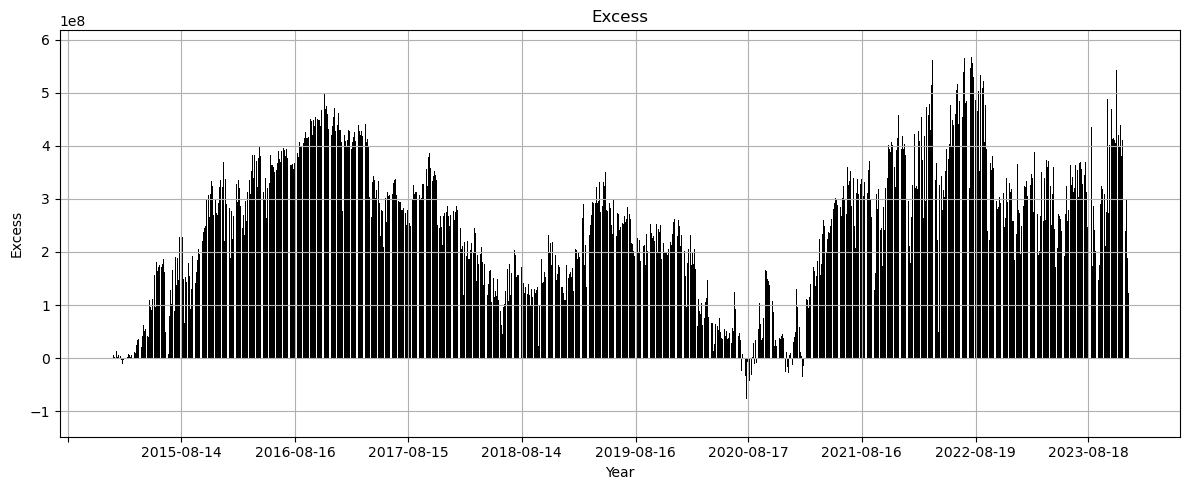

In [244]:
plt.figure(figsize=(12, 5))
plt.bar(df_week.index, df_day['money'] - df_week['money'], linestyle='-', color='black')
# 设置间隔为一个月
months = MonthLocator(interval=8) 
# 应用间隔到 x 轴
plt.gca().xaxis.set_major_locator(months)

plt.title('Excess')
plt.xlabel('Year')
plt.ylabel('Excess')
plt.grid(True)
plt.tight_layout()

plt.show()